In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
import datetime
from sklearn.metrics import mean_squared_error

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import iqr
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm



<IPython.core.display.Javascript object>

In [2]:
warnings.filterwarnings("ignore")
%load_ext nb_black

<IPython.core.display.Javascript object>

In [105]:
df = pd.read_excel("champagne_new.xlsx", index_col=0)

<IPython.core.display.Javascript object>

## Phân tích khai phá dữ liệu (EDA)

In [7]:
df

,Month,monthly_champange
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
...,...,...
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413


<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


<IPython.core.display.Javascript object>

In [11]:
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

<IPython.core.display.Javascript object>

In [14]:
"""
Month đã có kiểu date type nên không cần chuyển sang datetype nữa
"""

'\nMonth đã có kiểu date type nên không cần chuyển sang datetype nữa\n'

<IPython.core.display.Javascript object>

In [16]:
# để đề phòng thôi ạ ^^
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

<IPython.core.display.Javascript object>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


<IPython.core.display.Javascript object>

In [18]:
"""
ta nhận thấy data ko có null
"""

'\nta nhận thấy data ko có null\n'

<IPython.core.display.Javascript object>

In [51]:
# đổi tên monthly_champange thành sale cho dễ hiểu dữ liệu
df.rename(columns={"monthly_champange": "Sales"}, inplace=True)

<IPython.core.display.Javascript object>

### Phân tích biến Sales (monthly_champange)

In [52]:
def continuous_univariate_analysis(f):
    print("1\ Describe: \n", f.describe(), "\n")
    print("2\ Meadian: ", f.median())
    print("3\ Mode: ", f.mode)
    print("4\ Range: ", f.values.ptp())
    print("5\ Variance: ", f.var())
    print("6\ Số NaN: ", f.isnull().sum())
    print("7\ \tQ1 = ", np.quantile(f, 0.25))
    print("   \tQ3 = ", np.quantile(f, 0.75))
    print("   \tIQR = ", iqr(f))

    print("8\ Skew: ", f.skew())
    if f.skew() > 0:
        print("Phân phối lệch phải")
    elif f.skew() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối lệch trái")

    print("9\ Kurtosis: ", f.kurtosis())
    if f.kurtosis() > 0:
        print("Phân phối nhọn hơn pp chuẩn")
    elif f.kurtosis() == 0:
        print("Phân phối đối xứng")
    else:
        print("Phân phối bẹt hơn pp chuẩn")

<IPython.core.display.Javascript object>

In [53]:
def visualize_histogram(f):
    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(f)

    plt.subplot(1, 2, 2)
    plt.hist(f)
    plt.show()

<IPython.core.display.Javascript object>

In [54]:
def visualize_boxplot(f):
    plt.boxplot(f)
    plt.show()

<IPython.core.display.Javascript object>

In [55]:
def find_outliers(f):
    Q1 = np.quantile(f, 0.25)
    Q3 = np.quantile(f, 0.75)
    IQR = Q3 - Q1

    # số lượng outliers
    num_outliers = len(f[(f > Q3 + 1.5 * IQR) | (f < Q1 - 1.5 * IQR)])

    # tỉ lệ outliers so với mẫu
    ratio = num_outliers / f.shape[0]

    print("Số lượng outliers: ", num_outliers)
    print("Tỉ lệ outliers so với mẫu", ratio)

<IPython.core.display.Javascript object>

1\ Describe: 
 count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64 

2\ Meadian:  4217.0
3\ Mode:  <bound method Series.mode of Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64>
4\ Range:  12503
5\ Variance:  6520375.534249084
6\ Số NaN:  0
7\ 	Q1 =  3113.0
   	Q3 =  5221.0
   	IQR =  2108.0
8\ Skew:  1.639003039912007
Phân phối lệch phải
9\ Kurtosis:  2.7028889288455717
Phân phối nhọn hơn pp chuẩn


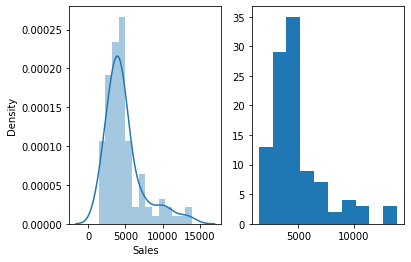

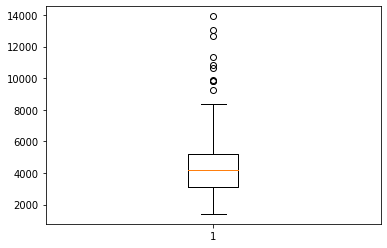

Số lượng outliers:  10
Tỉ lệ outliers so với mẫu 0.09523809523809523


<IPython.core.display.Javascript object>

In [56]:
continuous_univariate_analysis(df.Sales)
visualize_histogram(df.Sales)
visualize_boxplot(df.Sales)
find_outliers(df.Sales)

## <p style="color:blue">Nhận xét</p>

In [4]:
"""
Từ phân tích, ta thấy phân phối của Sales hơi lệch phải,
ko có giá trị null.

Có 10 outliers nhưng các outliers này là hợp lệ nên ta giữ nguyên
"""

'\nTừ phân tích, ta thấy phân phối của Sales hơi lệch phải,\nko có giá trị null.\n\nCó 10 outliers nhưng các outliers này là hợp lệ nên ta giữ nguyên\n'

<IPython.core.display.Javascript object>

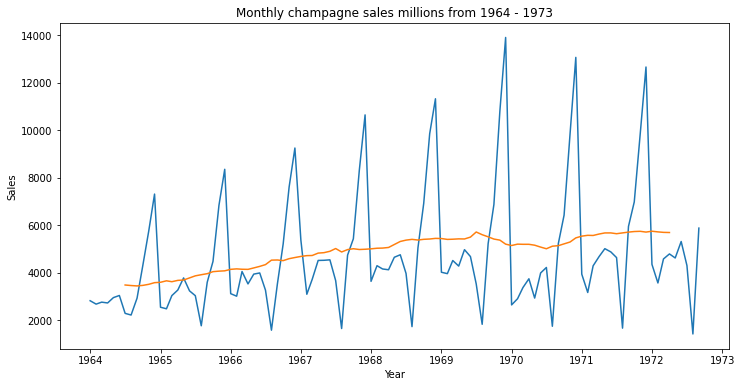

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.ylabel("Sales")
plt.xlabel("Year")
plt.plot(df.rolling(window=12, center=True).mean())
plt.title("Monthly champagne sales millions from 1964 - 1973")
plt.show()

## <p style="color:blue">Nhận xét</p>

In [34]:
"""

Nhận xét tổng quan:
ừ 1965 - giữa năm 1969, data có xu hướng đi lên, 
tuy nhiên từ giữa năm 1969 đến giữa năm 1970, data có xu hướng đi xuống
sau đó, từ data lại có xu hướng đi lên. 
Từ 1970 đến 1971, data có xu hướng đi ngang

Chúng ta có thể thấy rằng có tính thời vụ (seasonality) trong dữ liệu, 
với các đỉnh lặp lại chính nó. Ngoài ra các đỉnh ngày càng cao hơn qua từng năm.

"""

'\n\nNhận xét tổng quan:\nừ 1965 - giữa năm 1969, data có xu hướng đi lên, \ntuy nhiên từ giữa năm 1969 đến giữa năm 1970, data có xu hướng đi xuống\nsau đó, từ data lại có xu hướng đi lên. \nTừ 1970 đến 1971, data có xu hướng đi ngang\n\nChúng ta có thể thấy rằng có tính thời vụ (seasonality) trong dữ liệu, \nvới các đỉnh lặp lại chính nó. Ngoài ra các đỉnh ngày càng cao hơn qua từng năm.\n\n'

<IPython.core.display.Javascript object>

## Decompose

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose


<IPython.core.display.Javascript object>

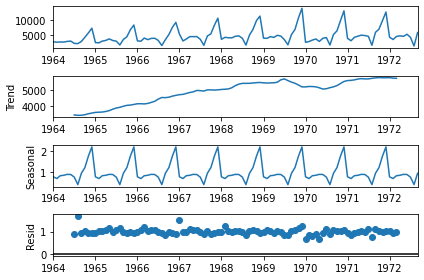

<IPython.core.display.Javascript object>

In [36]:
result = seasonal_decompose(df, model="multiplicative")
result.plot()
plt.show()

In [37]:
# Xét từng thành phần

<IPython.core.display.Javascript object>

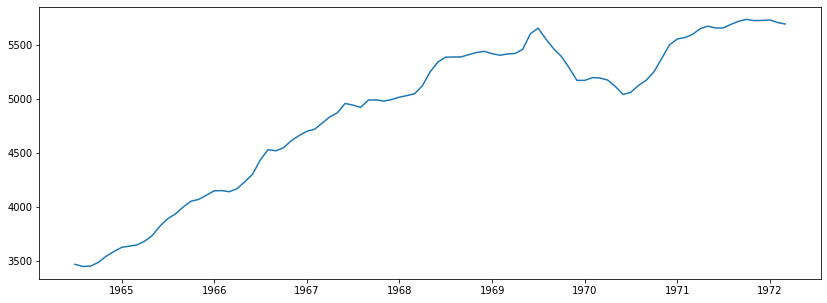

<IPython.core.display.Javascript object>

In [38]:
# xem xét yếu tố trend
plt.figure(figsize=(14, 5))
plt.plot(result.trend)
plt.show()

## <p style="color:blue">Nhận xét</p>

In [142]:
"""
# có trend
Ta thấy: từ 1965 - giữa năm 1969, data có xu hướng đi lên, 
tuy nhiên từ giữa năm 1969 đến giữa năm 1970, data có xu hướng đi xuống
sau đó, từ data lại có xu hướng đi lên
"""

'\n# có trend\nTa thấy: từ 1965 - giữa năm 1969, data có xu hướng đi lên, \ntuy nhiên từ giữa năm 1969 đến giữa năm 1970, data có xu hướng đi xuống\nsau đó, từ data lại có xu hướng đi lên\n'

<IPython.core.display.Javascript object>

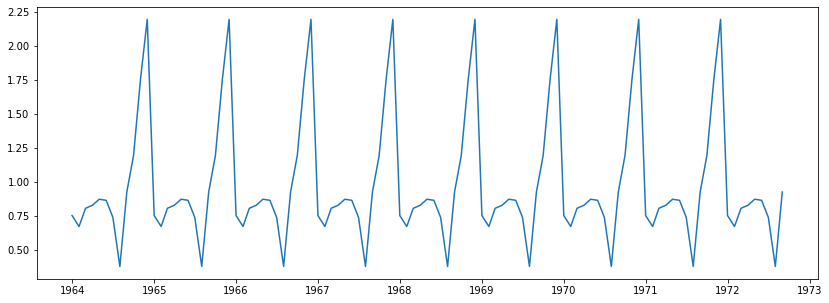

<IPython.core.display.Javascript object>

In [40]:
# xem xét yếu tố seasonal
plt.figure(figsize=(14, 5))
plt.plot(result.seasonal)
plt.show()

## <p style="color:blue">Nhận xét</p>

In [77]:
"""
- seasonal (mùa vụ): tăng giảm khá đều, tăng giảm theo đúng chu kỳ của nó
=> có tính mùa vụ
"""

'\n- seasonal (mùa vụ): tăng giảm khá đều, tăng giảm theo đúng chu kỳ của nó\n=> có tính mùa vụ\n'

<IPython.core.display.Javascript object>

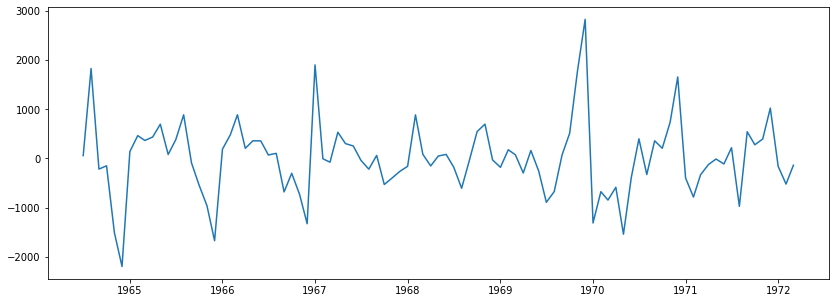

<IPython.core.display.Javascript object>

In [78]:
# xem xét yếu tố resid
plt.figure(figsize=(14, 5))
plt.plot(result.resid)
plt.show()

## <p style="color:blue">Nhận xét</p>

In [79]:
"""
resid tăng giảm bất thường, có những đột biến, có biến động bất thường (Irregular fluctuation) là những thay đổi đột ngột ngẫu
nhiên và không thể đoán trước
"""

'\nresid tăng giảm bất thường, có những đột biến, có biến động bất thường (Irregular fluctuation) là những thay đổi đột ngột ngẫu\nnhiên và không thể đoán trước\n'

<IPython.core.display.Javascript object>

## Build train and test sets

In [106]:
ts_train = df.loc[:"1970-06-01"]
ts_test = df["1970-06-01":]

print("train examples: ", ts_train.shape[0])
print("test examples: ", ts_test.shape[0])

train examples:  78
test examples:  28


<IPython.core.display.Javascript object>

In [107]:
ts_train.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<IPython.core.display.Javascript object>

In [108]:
ts_train.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
      

<IPython.core.display.Javascript object>

## Áp dụng auto_arima để xây dựng mô hình

In [109]:
from pmdarima import auto_arima

<IPython.core.display.Javascript object>

In [129]:
stepwise_model = auto_arima(
    df,
    start_p=2,
    start_q=2,
    max_p=5,
    max_q=5,
    m=12,
    start_P=1,
    seasonal=True,
    d=1,
    D=1,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1491.853, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1491.669, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1491.700, Time=0.62 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.18 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1491.649, Time=0.56 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.34 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.11 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=0.81 sec
 ARIMA(1,1,1)(1,1,1)[12]     

<IPython.core.display.Javascript object>

In [111]:
"""
=> model tốt nhất là ARIMA(1,1,1)(1,1,0)[12]  
"""

'\n=> model tốt nhất là ARIMA(1,1,1)(1,1,0)[12]  \n'

<IPython.core.display.Javascript object>

In [112]:
print(stepwise_model.aic())

1485.1904967252533


<IPython.core.display.Javascript object>

### Fit model

In [113]:
stepwise_model.fit(ts_train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

<IPython.core.display.Javascript object>

### Prediction

In [114]:
future_forecast = stepwise_model.predict(n_periods=len(ts_test))
future_forecast

array([ 3234.60082448,  1569.58527382,  4979.37610421,  6646.5740942 ,
       10513.30141447, 13519.63814245,  2500.56832624,  2739.80600248,
        3216.14456638,  3546.82643904,  2831.79661104,  3802.91641616,
        3025.30935948,  1357.88625284,  4767.10483146,  6433.18329348,
       10304.09453664, 13317.37466433,  2281.51451036,  2522.10374004,
        2998.09478242,  3331.33612535,  2609.92878753,  3586.76928084,
        2810.86826403,  1143.60188073,  4552.8577109 ,  6219.00905021])

<IPython.core.display.Javascript object>

### Visualization

In [115]:
future_forecast = pd.DataFrame(
    future_forecast, index=ts_test.index, columns=["Prediction"]
)
future_forecast.head()

,Prediction
Month,
1970-06-01,3234.600824
1970-07-01,1569.585274
1970-08-01,4979.376104
1970-09-01,6646.574094
1970-10-01,10513.301414


<IPython.core.display.Javascript object>

In [116]:
predict2 = future_forecast.copy()

<IPython.core.display.Javascript object>

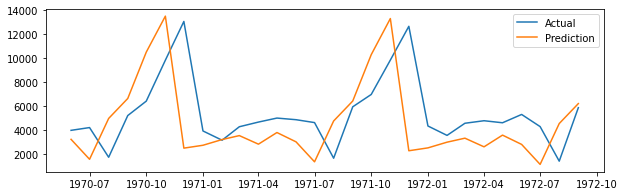

<IPython.core.display.Javascript object>

In [193]:
plt.figure(figsize=(10, 3))
plt.plot(ts_test, label="Actual")
plt.plot(future_forecast, label="Prediction")
# plt.xticks(rotation=85)
plt.legend()
plt.show()

In [188]:
"""
Nhìn chung, predict có xu hướng khá khớp so với actual.
Tuy nhiên, bị lệch 1 đoạn, có thể do bị lệch dữ liệu => dùng shift để điều chỉnh lại dữ liệu
"""

'\nNhìn chung, predict có xu hướng khá khớp so với actual.\nTuy nhiên, bị lệch 1 đoạn, có thể do bị lệch dữ liệu => dùng shift để điều chỉnh lại dữ liệu\n'

<IPython.core.display.Javascript object>

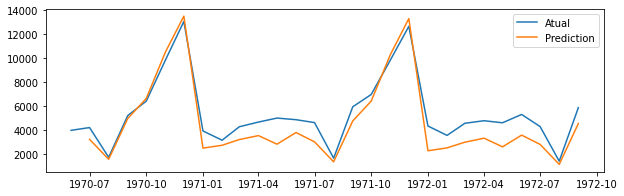

<IPython.core.display.Javascript object>

In [194]:
plt.figure(figsize=(10, 3))
plt.plot(ts_test, label="Atual")
plt.plot(future_forecast.shift(1), label="Prediction")
# plt.xticks(rotation=85)
plt.legend()
plt.show()

## <p style="color:blue">Nhận xét</p>

In [118]:
"""
về cơ bản, xu hướng dự đoán khá khớp với thực tế (test data).
Tuy nhiên, vẫn có một khoảng sai lệch nhỏ trong khoảng thời gian từ 1971-01 đến 1971-07 và 1972-01 đến 1972-07
"""

'\nvề cơ bản, xu hướng dự đoán khá khớp với thực tế (test data).\nTuy nhiên, vẫn có một khoảng sai lệch nhỏ, đặc biệt trong khoảng thời gian từ 1971-01 đến 1971-07 và 1972-01 đến 1972-07\n'

<IPython.core.display.Javascript object>

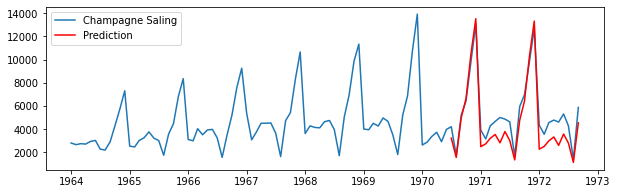

<IPython.core.display.Javascript object>

In [121]:
plt.figure(figsize=(10, 3))
plt.plot(df, label="Champagne Saling")
plt.plot(future_forecast.shift(1), label="Prediction", color="red")
plt.legend()
plt.show()

## <p style="color:blue">Nhận xét</p>

In [122]:
"""
Nhìn chung, giá trị dự đoán khá khớp với thực tế
=> kết quả phù hợp
"""

'\nNhìn chung, giá trị dự đoán khá khớp với thực tế\n=> kết quả phù hợp\n'

<IPython.core.display.Javascript object>

### Dự đoán số tiền champagne bán được của 9 tháng tiếp theo

In [123]:
future_forecast2 = stepwise_model.predict(n_periods=len(ts_test) + 9)
future_forecast2

array([ 3234.60082448,  1569.58527382,  4979.37610421,  6646.5740942 ,
       10513.30141447, 13519.63814245,  2500.56832624,  2739.80600248,
        3216.14456638,  3546.82643904,  2831.79661104,  3802.91641616,
        3025.30935948,  1357.88625284,  4767.10483146,  6433.18329348,
       10304.09453664, 13317.37466433,  2281.51451036,  2522.10374004,
        2998.09478242,  3331.33612535,  2609.92878753,  3586.76928084,
        2810.86826403,  1143.60188073,  4552.8577109 ,  6219.00905021,
       10089.64793486, 13102.47607193,  2067.70890924,  2308.2101576 ,
        2784.22382239,  3117.29855291,  2396.3063683 ,  3372.77446515,
        2596.76239121])

<IPython.core.display.Javascript object>

In [124]:
months = pd.date_range("1972-09-01", "1973-05-01", freq="MS")
months

DatetimeIndex(['1972-09-01', '1972-10-01', '1972-11-01', '1972-12-01',
               '1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01'],
              dtype='datetime64[ns]', freq='MS')

<IPython.core.display.Javascript object>

In [125]:
new_predict = pd.DataFrame({"DATE": months, "Sales": future_forecast2[len(ts_test) :]})
new_predict.set_index("DATE", inplace=True)
new_predict.head()

,Sales
DATE,
1972-09-01,10089.647935
1972-10-01,13102.476072
1972-11-01,2067.708909
1972-12-01,2308.210158
1973-01-01,2784.223822


<IPython.core.display.Javascript object>

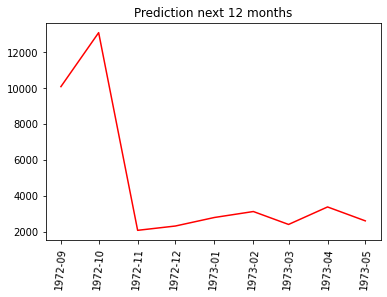

<IPython.core.display.Javascript object>

In [126]:
plt.plot(new_predict, label="Prediction", color="red")
plt.xticks(rotation=85)
plt.title("Prediction next 12 months")
plt.show()

## <p style="color:blue">Nhận xét</p>

In [131]:
"""
ta thấy xu hướng của dữ liệu:
từ tháng 9-10/1972, có xu hướng đi lên,
từ tháng 10 đến tháng 11, đi xuống,
tháng 11/1972 - 2/1973, có xu hướng đi lên
2-3/1973: đi xuống 
3-4/1973: đi lên 
4-5/1973: đi xuống 

"""

'\nta thấy xu hướng của dữ liệu:\ntừ tháng 9-10/1972, có xu hướng đi lên,\ntừ tháng 10 đến tháng 11, đi xuống,\ntháng 11/1972 - 2/1973, có xu hướng đi lên\n2-3/1973: đi xuống \n3-4/1973: đi lên \n4-5/1973: đi xuống \n\n'

<IPython.core.display.Javascript object>

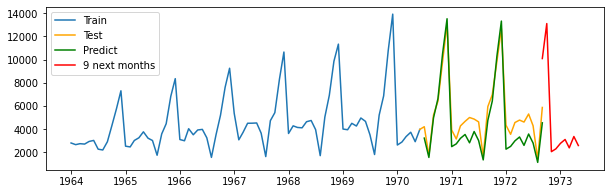

<IPython.core.display.Javascript object>

In [127]:
plt.figure(figsize=(10, 3))
plt.plot(ts_train, label="Train")
plt.plot(ts_test, label="Test", color="orange")
plt.plot(predict2.shift(1), label="Predict", color="green")
plt.plot(new_predict, label="9 next months", color="red")

plt.legend()
plt.show()

## <p style="color:blue">Nhận xét</p>

In [187]:
"""
Nhận xét:
 predict data khá khớp với actual data, ở phần dự đoán 9 tháng, 
 tuy nhiên, ở một số đoạn thời gian từ tháng 2 đến tháng 7 mỗi năm có khoảng chênh lệch lớn
 và có 1 đoạn bị đứt nét (không liên tục) là tháng 9/1972
 
 => thử thuật toán khác xem có cải thiện không!
"""

'\nNhận xét:\n predict data khá khớp với actual data, ở phần dự đoán 9 tháng, \n tuy nhiên, ở một số đoạn thời gian từ tháng 2 đến tháng 7 mỗi năm có khoảng chênh lệch lớn\n và có 1 đoạn bị đứt nét (không liên tục) là tháng 9/1972\n \n => thử thuật toán khác xem có cải thiện không!\n'

<IPython.core.display.Javascript object>

## Áp dụng holt-winters để xây dựng mô hình

In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<IPython.core.display.Javascript object>

In [134]:
hw_model = ExponentialSmoothing(ts_train, seasonal="mul", seasonal_periods=12).fit()

<IPython.core.display.Javascript object>

### Prediction

In [137]:
pred = hw_model.predict(start=ts_test.index[0], end=ts_test.index[-1])

<IPython.core.display.Javascript object>

In [138]:
ts_test.index

DatetimeIndex(['1970-06-01', '1970-07-01', '1970-08-01', '1970-09-01',
               '1970-10-01', '1970-11-01', '1970-12-01', '1971-01-01',
               '1971-02-01', '1971-03-01', '1971-04-01', '1971-05-01',
               '1971-06-01', '1971-07-01', '1971-08-01', '1971-09-01',
               '1971-10-01', '1971-11-01', '1971-12-01', '1972-01-01',
               '1972-02-01', '1972-03-01', '1972-04-01', '1972-05-01',
               '1972-06-01', '1972-07-01', '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

<IPython.core.display.Javascript object>

### Visualization

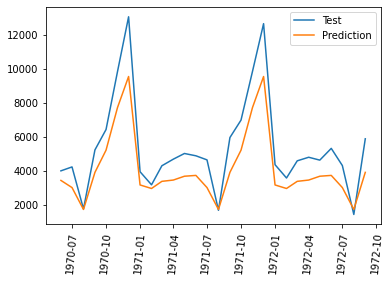

<IPython.core.display.Javascript object>

In [196]:
plt.plot(ts_test, label="Test")
plt.plot(pred, label="Prediction")
# plt.plot(pred + mae, label='Prediction')
plt.xticks(rotation=85)
plt.legend()
plt.show()

## <p style="color:blue">Nhận xét</p>

In [179]:
"""
predict data khá khớp với xu hướng của actual data
có 1 phần chênh lệch nhỏ

=> thử điều chỉnh sai số
"""

'\npredict data khá khớp với xu hướng của actual data\ncó 1 phần chênh lệch nhỏ\n\n=> thử điều chỉnh sai số\n'

<IPython.core.display.Javascript object>

In [168]:
mae = mean_absolute_error(ts_test, pred)
pred_2 = mae + pred

<IPython.core.display.Javascript object>

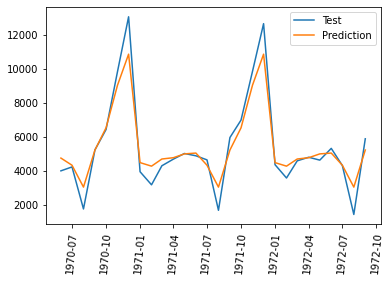

<IPython.core.display.Javascript object>

In [178]:
plt.plot(ts_test, label="Test")
plt.plot(pred_2, label="Prediction")
# plt.plot(pred + mae, label='Prediction')
plt.xticks(rotation=85)
plt.legend()
plt.show()

## <p style="color:blue">Nhận xét</p>

In [180]:
"""
Sau khi điều chỉnh, predict và actual đã khớp nhau hơn
"""

'\nSau khi điều chỉnh, predict và actual đã khớp nhau hơn\n'

<IPython.core.display.Javascript object>

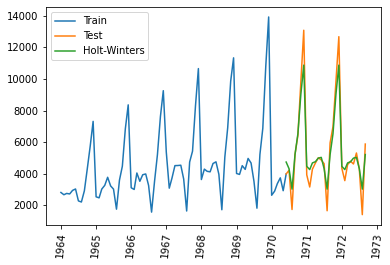

<IPython.core.display.Javascript object>

In [170]:
plt.plot(ts_train, label="Train")
plt.plot(ts_test, label="Test")
plt.plot(pred_2, label="Holt-Winters")
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [172]:
"""
Sau khi cộng thêm 1 phần sai số, phần predict đã khớp hơn so với lúc trước
"""

'\nSau khi cộng thêm 1 phần sai số, phần predict đã khớp hơn so với lúc trước\n'

<IPython.core.display.Javascript object>

### Dự đoán số tiền champagne bán được của 9 tháng tiếp theo

In [155]:
start_date = datetime.datetime(1972, 9, 1)
end_date = datetime.datetime(1973, 5, 1)

<IPython.core.display.Javascript object>

In [156]:
pred_next_9 = hw_model.predict(start=start_date, end=end_date)
pred_next_9

1972-09-01    3896.551646
1972-10-01    5206.033134
1972-11-01    7719.541015
1972-12-01    9551.403826
1973-01-01    3153.501391
1973-02-01    2944.759342
1973-03-01    3366.479738
1973-04-01    3443.004605
1973-05-01    3668.426652
Freq: MS, dtype: float64

<IPython.core.display.Javascript object>

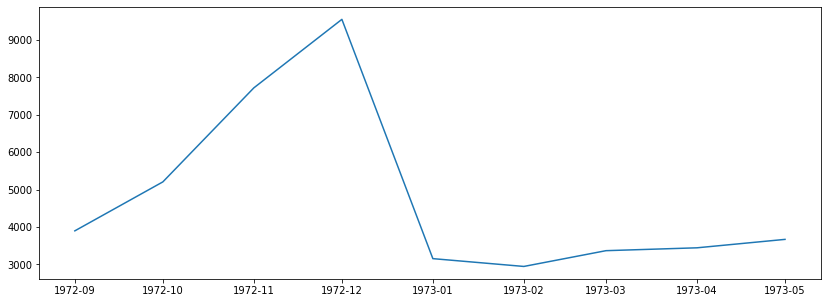

<IPython.core.display.Javascript object>

In [174]:
plt.figure(figsize=(14, 5))
plt.plot(pred_next_9.index, pred_next_9.values)
plt.show()

## <p style="color:blue">Nhận xét</p>

In [ ]:
'''
dữ liệu có xu hướng tăng từ tháng 9 đến giữa tháng 12 năm 1972
và giảm mạnh tới đầu tháng 1/1973.

sau đó giảm nhẹ từ tháng 1 đến tháng 2 /1973 và tăng lại từ từ vào các tháng tiếp theo

Lý do: có thể là trong dịp giáng sinh và năm mới, khách hàng có nhu cầu sử dụng champagne
nên họ đã chuẩn bị trước từ khoảng tháng 10 (nhìn vào đồ thị, đây là thời điểm tăng mạnh nhất)

Thời điểm giữa tháng 12 tới tháng 1, số liệu giảm mạnh do khách hàng đã mua sắm từ trước rồi 
và còn có thể do các cửa hàng nghỉ lễ nên không bán nữa. 


'''

#### Biểu đồ khi chưa điều chỉnh sai số

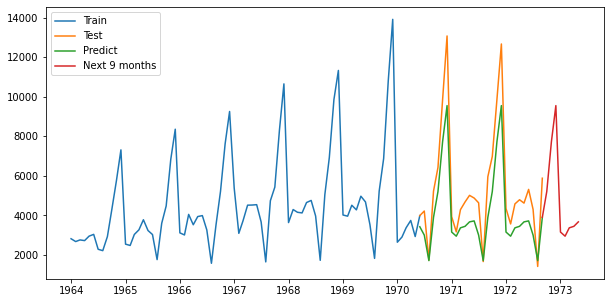

<IPython.core.display.Javascript object>

In [190]:
plt.figure(figsize=(10, 5))
plt.plot(ts_train, label="Train")
plt.plot(ts_test, label="Test")
plt.plot(pred, label="Predict")
plt.plot(pred_next_9, label="Next 9 months")
plt.legend()
plt.show()

#### Biểu đồ sau khi điều chỉnh sai số

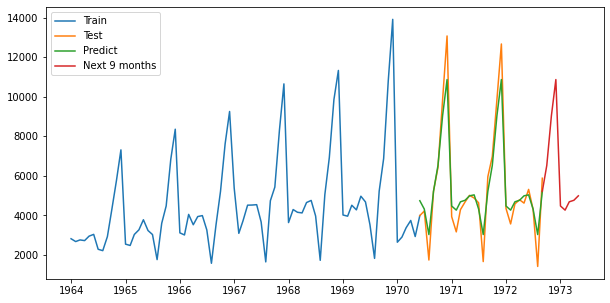

<IPython.core.display.Javascript object>

In [192]:
pred_next_9_new = pred_next_9 + mae
plt.figure(figsize=(10, 5))
plt.plot(ts_train, label="Train")
plt.plot(ts_test, label="Test")
plt.plot(pred_2, label="Predict")
plt.plot(pred_next_9_new, label="Next 9 months")
plt.legend()
plt.show()

## Đánh giá

In [186]:
"""
Nhìn chung, Auto_Arima cho kết quả khá ổn, tuy nhiên có một vài khoảng thời gian chưa được chính xác (sai số có lớn)
Holt Winters cho kết quả tốt, sai số nhỏ

=> chọn holt winters cho dataset này
"""

'\nNhìn chung, Auto_Arima cho kết quả khá ổn, tuy nhiên có một vài khoảng thời gian chưa được chính xác (sai số có lớn)\nHolt Winters cho kết quả tốt, sai số nhỏ\n\n=> chọn holt winters cho dataset này\n'

<IPython.core.display.Javascript object>